### Họ và tên: Nguyễn Thành Luân
### MSSV: 20521582
### LAB01


#### Bài 2: Thực hiện khảo sát và tiền xử lý dữ liệu cho dữ liệu Bank marketing.

#### Import thư viện

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#### Đọc dữ liệu đầu vào

In [2]:
with open('bank-full.csv') as f:
    df = pd.read_csv(f, dtype = {'age' : np.float64})

#### Xem xết dữ liệu ban đầu với hàm head() và info()

In [3]:
df.head(12)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28.0,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42.0,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58.0,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43.0,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 5.9+ MB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### Lấy ra 5 thuộc tính có số lượng giá trị unknown nhiều nhất

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2=(round(percent_1,1)).sort_values(ascending=False)
missing_data=pd.concat([total, percent_2], axis=1, keys=['Total','%'])
missing_data.head(5)
list_unknown = []
for col in df.columns.values:
    list_unknown.append(df[df[col]=='unknown'].shape[0])
df_unknown = pd.DataFrame([], columns = ['unknown'], index=df.columns.values)

df_unknown['unknown'] = list_unknown

df_unknown.sort_values(by=df_unknown.columns[0],ascending=False).head(5)

,unknown
poutcome,36959
contact,13020
education,1857
job,288
month,0


#### Xem xét thống kê giữa thuộc tính Độ tuổi (age), Nhà (housing) và khoản vay tài chính (loan)

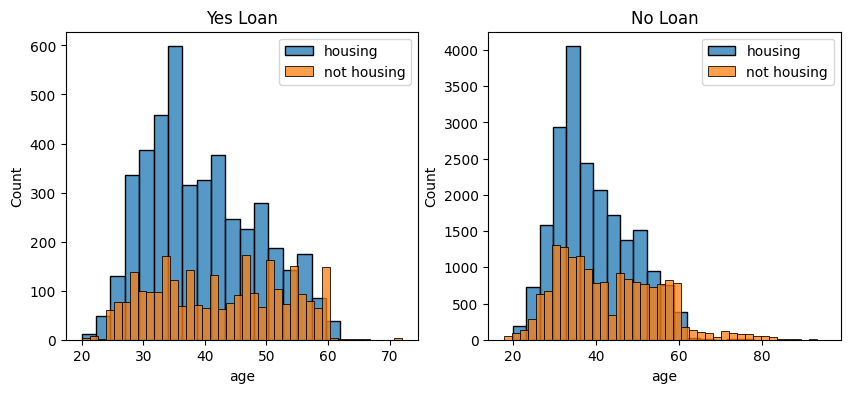

In [8]:
housing = 'housing'
not_housing = 'not housing'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
yes_loan = df[df['loan']=='yes']
no_loan = df[df['loan']=='no']
ax = sns.histplot(yes_loan[yes_loan['housing']=='yes'].age.dropna(), bins=18, label = housing, ax = axes[0], kde =False)
ax = sns.histplot(yes_loan[yes_loan['housing']=='no'].age.dropna(), bins=40, label = not_housing, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Yes Loan')
ax = sns.histplot(no_loan[no_loan['housing']=='yes'].age.dropna(), bins=18, label = housing, ax = axes[1], kde =False)
ax = sns.histplot(no_loan[no_loan['housing']=='no'].age.dropna(), bins=40, label = not_housing, ax = axes[1], kde =False)
ax.legend()
_ = ax.set_title('No Loan')

#### Xem xét tương quan giữ cột y (Đăng ký gửi tiền có kỳ hạn) với các cột khác

#### Đối với Job

<Axes: title={'center': 'Job & y'}>

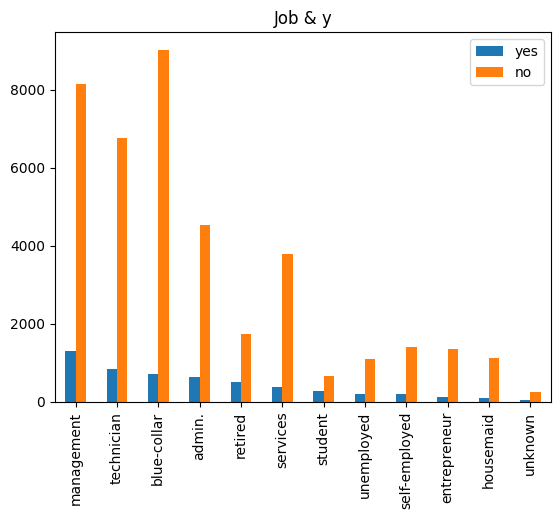

In [9]:
j_df = pd.DataFrame()
j_df['yes'] = df[df['y'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['y'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job & y')

#### Đối với Martial

<Axes: title={'center': 'Marital & y'}>

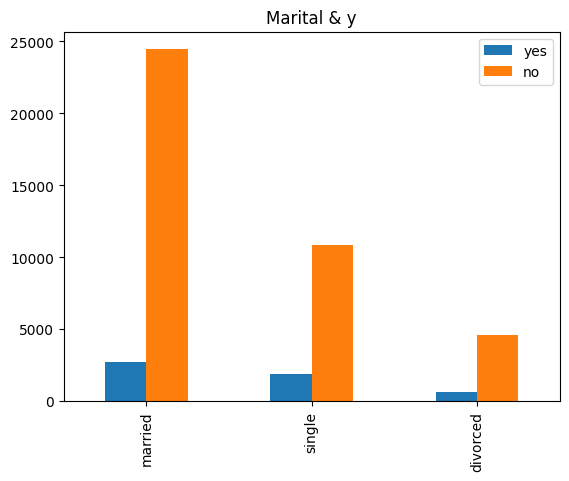

In [10]:
m_df = pd.DataFrame()
m_df['yes'] = df[df['y'] == 'yes']['marital'].value_counts()
m_df['no'] = df[df['y'] == 'no']['marital'].value_counts()

m_df.plot.bar(title = 'Marital & y')

#### Đối với Education

<Axes: title={'center': 'Education & y'}>

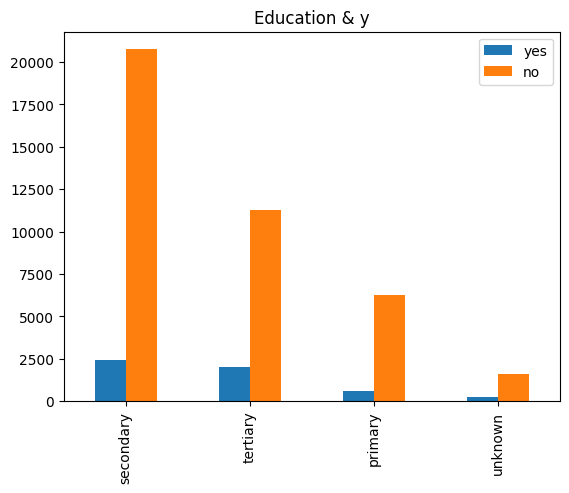

In [11]:
e_df = pd.DataFrame()
e_df['yes'] = df[df['y'] == 'yes']['education'].value_counts()
e_df['no'] = df[df['y'] == 'no']['education'].value_counts()

e_df.plot.bar(title = 'Education & y')

#### Đối với Contact

<Axes: title={'center': 'Contact & y'}>

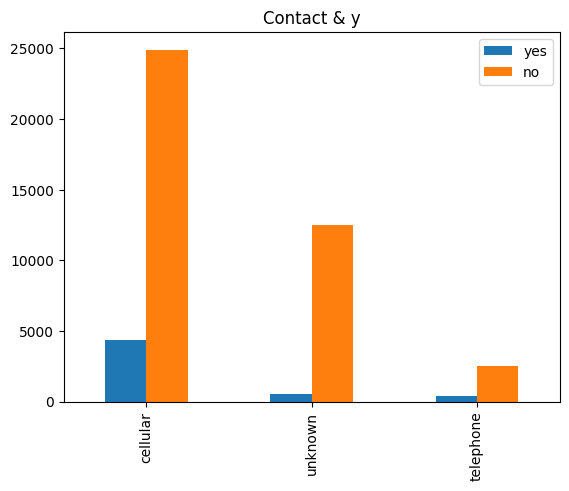

In [12]:
c_df = pd.DataFrame()
c_df['yes'] = df[df['y'] == 'yes']['contact'].value_counts()
c_df['no'] = df[df['y'] == 'no']['contact'].value_counts()

c_df.plot.bar(title = 'Contact & y')

#### Đối với Age

<Axes: title={'center': 'Age & y'}>

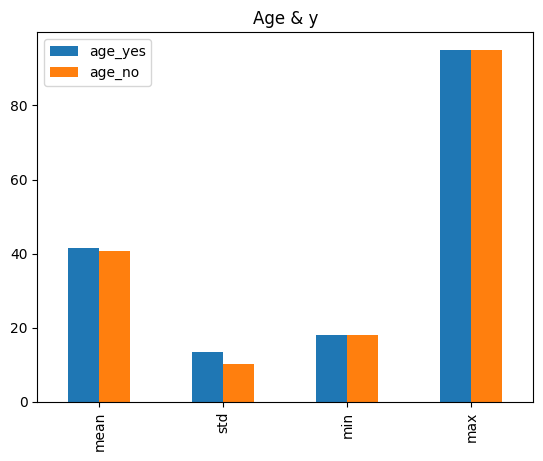

In [13]:
a_df = pd.DataFrame()
a_df['age_yes'] = (df[df['y'] == 'yes'][['y','age']].describe())['age']
a_df['age_no'] = (df[df['y'] == 'no'][['y','age']].describe())['age']

a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age & y')

#### Đối với Campaign

<Axes: title={'center': 'Campaign & y'}>

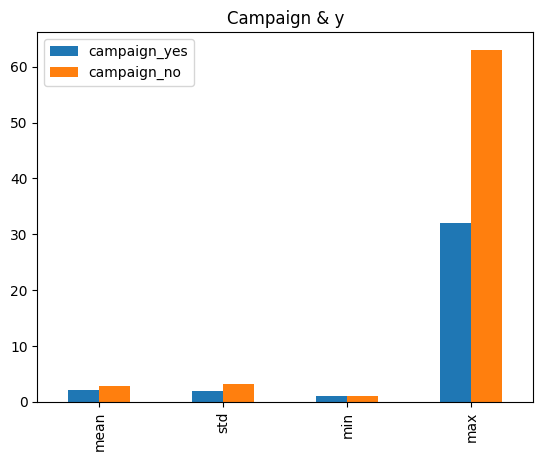

In [14]:
c_df = pd.DataFrame()
c_df['campaign_yes'] = (df[df['y'] == 'yes'][['y','campaign']].describe())['campaign']
c_df['campaign_no'] = (df[df['y'] == 'no'][['y','campaign']].describe())['campaign']

c_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Campaign & y')

#### Đối với Previous

<Axes: title={'center': 'Previous & y'}>

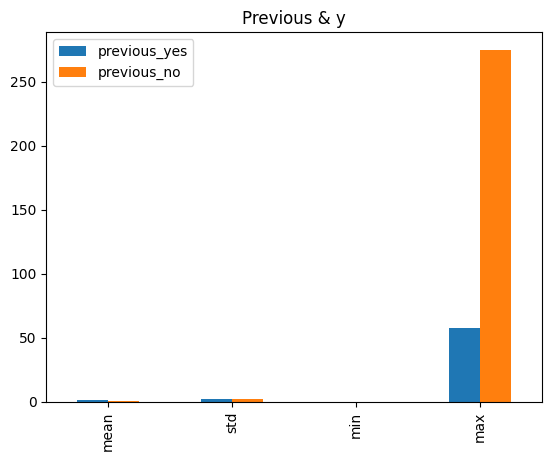

In [15]:
p_df = pd.DataFrame()
p_df['previous_yes'] = (df[df['y'] == 'yes'][['y','previous']].describe())['previous']
p_df['previous_no'] = (df[df['y'] == 'no'][['y','previous']].describe())['previous']

p_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Previous & y')

In [16]:
df = df.drop(['poutcome'], axis=1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 5.5+ MB


#### Xét thuộc tính Contact

In [18]:
df['contact'].describe()

count        45211
unique           3
top       cellular
freq         29285
Name: contact, dtype: object

In [19]:
common_value = 'cellular'

for dataset in [df]:
    dataset['contact'] = dataset['contact'].replace(to_replace='unknown', value=common_value)

#### Xét thuộc tính Education 

In [20]:
df['education'].describe()

count         45211
unique            4
top       secondary
freq          23202
Name: education, dtype: object

#### Thay thế unknown bằng secondary

In [21]:
common_value = 'secondary'

for dataset in [df]:
    dataset['education'] = dataset['education'].replace(to_replace='unknown', value=common_value)

#### Xét thuộc tính Job

In [22]:
df['job'].describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

#### Thay thế unknown bằng blue-collar

In [23]:
common_value = 'blue-collar'

for dataset in [df]:
    dataset['job'] = dataset['job'].replace(to_replace='unknown', value=common_value)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  y          45211 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 5.5+ MB


#### Chuyển đổi thuôc tính tuổi (age) thành các nhóm tuổi chia giá trị tuổi thành 8 nhóm nhỏ

In [25]:
for dataset in [df]:
    dataset.loc[ dataset['age'] <= 28, 'age' ] = 0
    dataset.loc[(dataset['age'] > 28) & (dataset['age'] <= 38), 'age' ] = 1
    dataset.loc[(dataset['age'] > 38) & (dataset['age'] <= 48), 'age' ] = 2
    dataset.loc[(dataset['age'] > 48) & (dataset['age'] <= 58), 'age' ] = 3
    dataset.loc[(dataset['age'] > 58) & (dataset['age'] <= 68), 'age' ] = 4
    dataset.loc[(dataset['age'] > 68) & (dataset['age'] <= 78), 'age' ] = 5
    dataset.loc[ dataset['age'] > 78, 'age' ] = 6

In [26]:
df['age'].value_counts()

1.0    17787
2.0    12148
3.0     8634
0.0     4088
4.0     1956
5.0      443
6.0      155
Name: age, dtype: int64

#### Chuyển đổi tháng thành số

In [27]:
months = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}

for dataset in [df]:
    dataset['month'] = dataset['month'].map(months)

In [28]:
df.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,3.0,management,married,tertiary,no,2143,yes,no,cellular,5,5,261,1,-1,0,no
1,2.0,technician,single,secondary,no,29,yes,no,cellular,5,5,151,1,-1,0,no
2,1.0,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,5,76,1,-1,0,no
3,2.0,blue-collar,married,secondary,no,1506,yes,no,cellular,5,5,92,1,-1,0,no
4,1.0,blue-collar,single,secondary,no,1,no,no,cellular,5,5,198,1,-1,0,no
5,1.0,management,married,tertiary,no,231,yes,no,cellular,5,5,139,1,-1,0,no
6,0.0,management,single,tertiary,no,447,yes,yes,cellular,5,5,217,1,-1,0,no
7,2.0,entrepreneur,divorced,tertiary,yes,2,yes,no,cellular,5,5,380,1,-1,0,no
8,3.0,retired,married,primary,no,121,yes,no,cellular,5,5,50,1,-1,0,no
9,2.0,technician,single,secondary,no,593,yes,no,cellular,5,5,55,1,-1,0,no
